# You Tube Trending Videos Analysis

# Introduction
    YouTube (the world-famous video sharing website) maintains a list of the top trending videos on the platform. According to Variety magazine, “To determine the year’s top-trending videos, YouTube uses a combination of factors including measuring users interactions (number of views, shares, comments and likes). Note that they’re not the most-viewed videos overall for the calendar year”. Top performers on the YouTube trending list are music videos (such as the famously virile “Gangam Style”), celebrity and/or reality TV performances, and the random dude-with-a-camera viral videos that YouTube is well-known for. This dataset is a daily record of the top trending YouTube videos.

# Problem Identification
    Looking for the most popular videos, it’s a mix of classics and current-generation staples. Some have stood the test of time, others very much seem to be products of their era. Through analysis of various factors, valuable insights can be drawn which helps youtubers to increase their views, likes and comments.Possible analysis include:
    -Sentiment analysis in a variety of forms
    -Categorising YouTube videos based on their comments and statistics.
    -Training ML algorithms like RNNs to generate their own YouTube comments.
    -Analysing what factors affect how popular a YouTube video will be.
    -Statistical analysis over time.

# Load the required Libraries

In [111]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar as cal
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

# Load the Data from CSV files.

In [112]:
df1 = pd.read_csv("USvideos.csv")

In [113]:
df2 = pd.read_csv("US_category_id.csv")

Joining of the two CSV files on the common column ‘category_id’.

In [114]:
yt=pd.merge(df1,df2,on='category_id')      

# Data Overview
    Top 5 records in the dataset

In [115]:
yt.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs
1,0mlNzVSJrT0,17.14.11,Me-O Cats Commercial,Nobrand,22,2017-04-21T06:47:32.000Z,"cute|""cats""|""thai""|""eggs""",98966,2486,184,532,https://i.ytimg.com/vi/0mlNzVSJrT0/default.jpg,False,False,False,Kittens come out of the eggs in a Thai commerc...,People & Blogs
2,STI2fI7sKMo,17.14.11,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,22,2017-11-11T15:00:03.000Z,"shawn johnson|""andrew east""|""shawn east""|""shaw...",321053,4451,1772,895,https://i.ytimg.com/vi/STI2fI7sKMo/default.jpg,False,False,False,Subscribe for weekly videos ▶ http://bit.ly/sj...,People & Blogs
3,KODzih-pYlU,17.14.11,BLIND(folded) CAKE DECORATING CONTEST (with Mo...,Grace Helbig,22,2017-11-11T18:08:04.000Z,"itsgrace|""funny""|""comedy""|""vlog""|""grace""|""helb...",197062,7250,217,456,https://i.ytimg.com/vi/KODzih-pYlU/default.jpg,False,False,False,Molly is an god damn amazing human and she cha...,People & Blogs
4,8mhTWqWlQzU,17.14.11,Wearing Online Dollar Store Makeup For A Week,Safiya Nygaard,22,2017-11-11T01:19:33.000Z,wearing online dollar store makeup for a week|...,2744430,115426,1110,6541,https://i.ytimg.com/vi/8mhTWqWlQzU/default.jpg,False,False,False,I found this online dollar store called ShopMi...,People & Blogs


# Dimensions of the dataset

In [116]:
yt.shape

(40949, 17)

# Dataset Summary

In [117]:
yt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40949 entries, 0 to 40948
Data columns (total 17 columns):
video_id                  40949 non-null object
trending_date             40949 non-null object
title                     40949 non-null object
channel_title             40949 non-null object
category_id               40949 non-null int64
publish_time              40949 non-null object
tags                      40949 non-null object
views                     40949 non-null int64
likes                     40949 non-null int64
dislikes                  40949 non-null int64
comment_count             40949 non-null int64
thumbnail_link            40949 non-null object
comments_disabled         40949 non-null bool
ratings_disabled          40949 non-null bool
video_error_or_removed    40949 non-null bool
description               40379 non-null object
category                  40949 non-null object
dtypes: bool(3), int64(5), object(9)
memory usage: 4.8+ MB


# Statistical Summary of the Dataset

In [118]:
yt.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


# Data Cleaning
    Data cleansing is a very crucial step in the overall data preparation process and is the process of analysing, identifying and correcting messy, raw data.
    So we have gotten a basic understanding of how our dataset looks like, the next step is to identify and handle :
        -Irrelevant columns
        -Duplicate rows
        -Columns with incorrect data types
        -Missing columns / values    

In [119]:
yt=yt.drop_duplicates(keep = 'first')

    The columns publish_time and trending_date currently have a data type of object which we need to change to DateTime to be able to extract month and year as columns from it for our further analysis.

In [120]:
yt["publish_time"]= pd.to_datetime(yt["publish_time"]) 

In [121]:
yt["trending_date"]= pd.to_datetime(yt["trending_date"],format='%y.%d.%m') 

# Video Specific
    Top 5 videos with the most views, likes, dislikes, comments.

In [122]:

# Most Liked videos 
yt.sort_values('likes',ascending=False).head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category
31839,7C2z4GqqS5E,2018-06-01,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,2018-05-18 09:00:02+00:00,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""|""FAK...",123010920,5613827,206892,1228655,https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...,Music
31796,7C2z4GqqS5E,2018-05-31,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,2018-05-18 09:00:02+00:00,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""|""FAK...",121219886,5595203,205565,1225326,https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...,Music
31754,7C2z4GqqS5E,2018-05-30,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,2018-05-18 09:00:02+00:00,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""|""FAK...",115664850,5530568,200995,1213172,https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...,Music
31709,7C2z4GqqS5E,2018-05-29,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,2018-05-18 09:00:02+00:00,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""|""FAK...",111882133,5486349,197638,1204867,https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...,Music
31669,7C2z4GqqS5E,2018-05-28,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,2018-05-18 09:00:02+00:00,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""|""FAK...",107756615,5439015,194172,1197130,https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...,Music


In [123]:
# Most Disliked videos 
yt.sort_values('dislikes',ascending=False).head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category
5912,QwZT7T-TXT0,2018-01-09,So Sorry.,Logan Paul Vlogs,24,2018-01-02 16:42:21+00:00,"logan paul vlog|""logan paul""|""logan""|""paul""|""o...",37539570,1402578,1674420,1361580,https://i.ytimg.com/vi/QwZT7T-TXT0/default.jpg,False,False,False,NaN,Entertainment
4703,FlsCjmMhFmw,2017-12-14,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06 17:58:51+00:00,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",149376127,3093544,1643059,810698,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",Entertainment
5860,QwZT7T-TXT0,2018-01-08,So Sorry.,Logan Paul Vlogs,24,2018-01-02 16:42:21+00:00,"logan paul vlog|""logan paul""|""logan""|""paul""|""o...",35983135,1370845,1611043,1321281,https://i.ytimg.com/vi/QwZT7T-TXT0/default.jpg,False,False,False,NaN,Entertainment
4647,FlsCjmMhFmw,2017-12-13,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06 17:58:51+00:00,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",137843120,3014471,1602383,817582,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",Entertainment
4583,FlsCjmMhFmw,2017-12-12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06 17:58:51+00:00,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",125432237,2912702,1545015,807558,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",Entertainment


In [124]:
# Most Viewed videos 
yt.sort_values('views',ascending=False).head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category
31902,VYOjWnS4cMY,2018-06-02,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06 04:00:07+00:00,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",225211923,5023450,343541,517232,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,Music
31856,VYOjWnS4cMY,2018-06-01,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06 04:00:07+00:00,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",220490543,4962403,338105,512337,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,Music
31813,VYOjWnS4cMY,2018-05-31,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06 04:00:07+00:00,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",217750076,4934188,335462,509799,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,Music
31770,VYOjWnS4cMY,2018-05-30,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06 04:00:07+00:00,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",210338856,4836448,326902,501722,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,Music
31725,VYOjWnS4cMY,2018-05-29,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06 04:00:07+00:00,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",205643016,4776680,321493,496211,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,Music


In [125]:
# Most commented videos 
yt.sort_values('comment_count',ascending=False).head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category
5912,QwZT7T-TXT0,2018-01-09,So Sorry.,Logan Paul Vlogs,24,2018-01-02 16:42:21+00:00,"logan paul vlog|""logan paul""|""logan""|""paul""|""o...",37539570,1402578,1674420,1361580,https://i.ytimg.com/vi/QwZT7T-TXT0/default.jpg,False,False,False,NaN,Entertainment
5860,QwZT7T-TXT0,2018-01-08,So Sorry.,Logan Paul Vlogs,24,2018-01-02 16:42:21+00:00,"logan paul vlog|""logan paul""|""logan""|""paul""|""o...",35983135,1370845,1611043,1321281,https://i.ytimg.com/vi/QwZT7T-TXT0/default.jpg,False,False,False,NaN,Entertainment
5814,QwZT7T-TXT0,2018-01-07,So Sorry.,Logan Paul Vlogs,24,2018-01-02 16:42:21+00:00,"logan paul vlog|""logan paul""|""logan""|""paul""|""o...",33998325,1325296,1517520,1281094,https://i.ytimg.com/vi/QwZT7T-TXT0/default.jpg,False,False,False,NaN,Entertainment
5726,QwZT7T-TXT0,2018-01-05,So Sorry.,Logan Paul Vlogs,24,2018-01-02 16:42:21+00:00,"logan paul vlog|""logan paul""|""logan""|""paul""|""o...",28407744,1204072,1278887,1238817,https://i.ytimg.com/vi/QwZT7T-TXT0/default.jpg,False,False,False,NaN,Entertainment
31839,7C2z4GqqS5E,2018-06-01,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,2018-05-18 09:00:02+00:00,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""|""FAK...",123010920,5613827,206892,1228655,https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...,Music


# Channel Specific
    Lets analyse number of youtube channels in each category as well as number of trending videos in each channel.    

In [126]:
#No. of Youtube channels in each category
yt.groupby('category')['channel_title'].count().sort_values(ascending=False)

category
Entertainment            9944
Music                    6467
Howto & Style            4142
Comedy                   3453
People & Blogs           3208
News & Politics          2485
Science & Technology     2397
Film & Animation         2343
Sports                   2172
Education                1655
Pets & Animals            920
Gaming                    816
Travel & Events           401
Autos & Vehicles          384
Shows                      57
Nonprofits & Activism      57
Name: channel_title, dtype: int64

In [127]:
# No. of videos in each channel
yt.groupby('channel_title')['video_id'].count().sort_values(ascending=False)

channel_title
ESPN                                      202
The Tonight Show Starring Jimmy Fallon    197
Netflix                                   193
TheEllenShow                              192
Vox                                       192
                                         ... 
chris lee                                   1
David Seymour                               1
David Steuer                                1
Dean Anderson                               1
Science vs Cinema                           1
Name: video_id, Length: 2207, dtype: int64

[Text(0, 0.5, 'Channel'), Text(0.5, 0, 'No. of videos')]

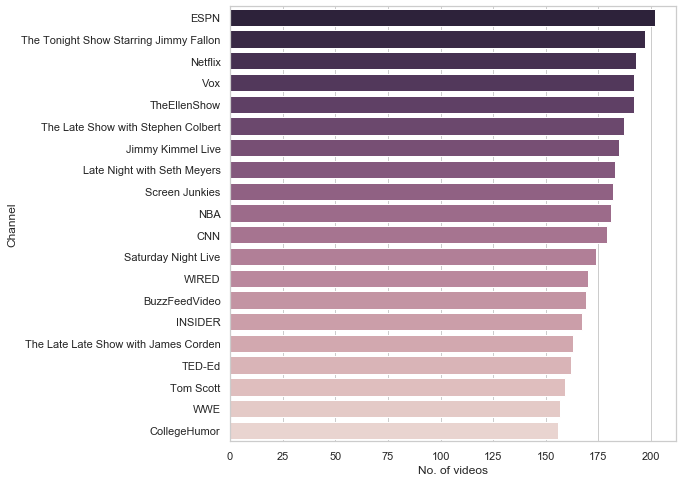

In [128]:
# No. of videos in each channel visualization
cdf = yt.groupby("channel_title").size().reset_index(name="video_count") \
    .sort_values("video_count", ascending=False).head(20)

fig, ax = plt.subplots(figsize=(8,8))
sns.barplot(x="video_count", y="channel_title", data=cdf,
                palette=sns.cubehelix_palette(n_colors=20, reverse=True), ax=ax)
ax.set(xlabel="No. of videos", ylabel="Channel")

# Published Time Specific
    We can see that the number of trending videos published on Sunday and Saturday are noticeably less than the number of trending videos published on other days of the week. Number of Trending videos published on the year 2018 are more than 2017. From the month July to October we can see very few number of Trending videos.

[Text(0, 0.5, 'No_of_videos'), Text(0.5, 0, 'Day')]

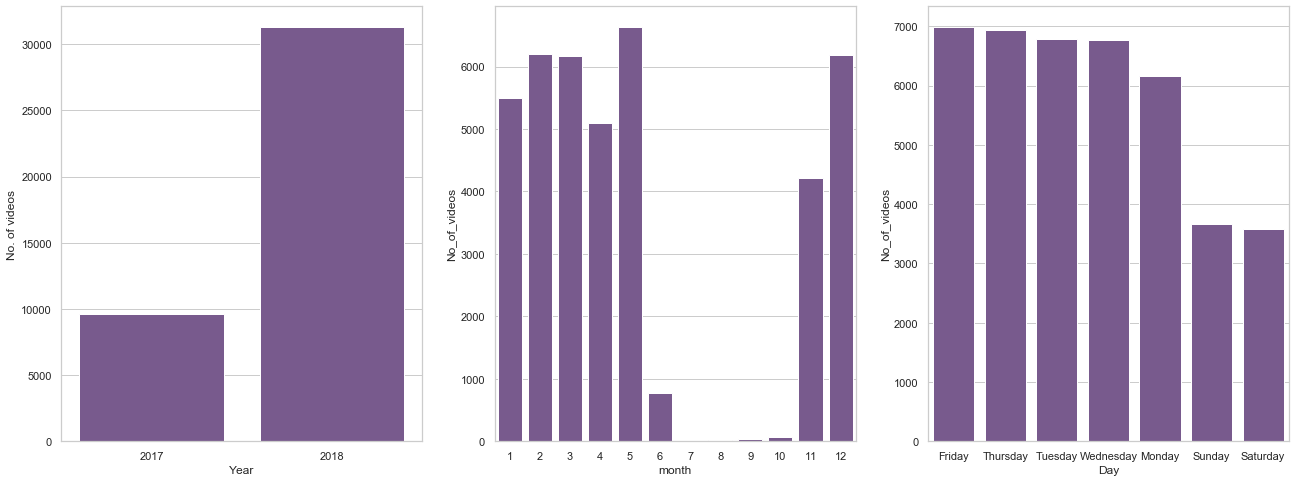

In [129]:
# No. Of Trending videos by Published year
yt2 = yt["trending_date"].apply(lambda x : x.year).value_counts() \
            .to_frame().reset_index() \
            .rename(columns={"index": "year", "trending_date": "No_of_videos"})

fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(22,8))
sns.barplot(x="year", y="No_of_videos", data=yt2, ax=ax1,palette=sns.color_palette(['#7a5195']),orient='v')
ax1.set(xlabel="Year", ylabel="No. of videos")

# No. Of Trending videos by Published Month
yt2 = yt["publish_time"].apply(lambda x : x.month).value_counts() \
            .to_frame().reset_index() \
            .rename(columns={ "publish_time": "No_of_videos","index": "month"}) .sort_values("No_of_videos", ascending=False)
sns.barplot(x="month", y="No_of_videos", data=yt2, ax=ax2,  palette=sns.color_palette(['#7a5195']),orient='v')
ax.set(xlabel="Month", ylabel="No_of_videos")

# No. Of Trending videos by Published day
yt2 = yt["publish_time"].apply(lambda x : cal.day_name[x.weekday()]).value_counts() \
            .to_frame().reset_index() \
            .rename(columns={ "publish_time": "No_of_videos","index": "day"})

sns.barplot(x="day", y="No_of_videos", data=yt2, ax=ax3,  palette=sns.color_palette(['#7a5195']),orient='v')
ax3.set(xlabel="Day", ylabel="No_of_videos")

# Category Specific
    Music Genre has maximum number of Trending videos whereas News & Politics has the least number of trending videos.

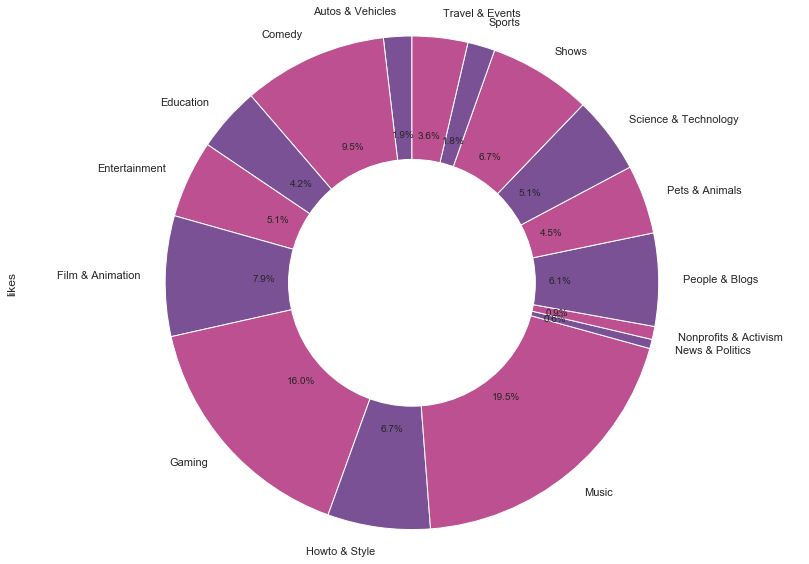

In [139]:
# Category wise Likes percentage
my_circle=plt.Circle( (0,0), 1.5, color='white')
plt.figure(figsize = (14,10))
yt.groupby(['category'])['likes'].quantile().plot(kind='pie',autopct='%.1f%%',startangle=90,radius=3,
                                                 colors=['#7a5195',   '#bc5090'])
plt.axis('equal')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

# Views and Likes Specific 
    There is a linear relationship between views and likes. Later period, the likes has been increased in a tremendous manner.

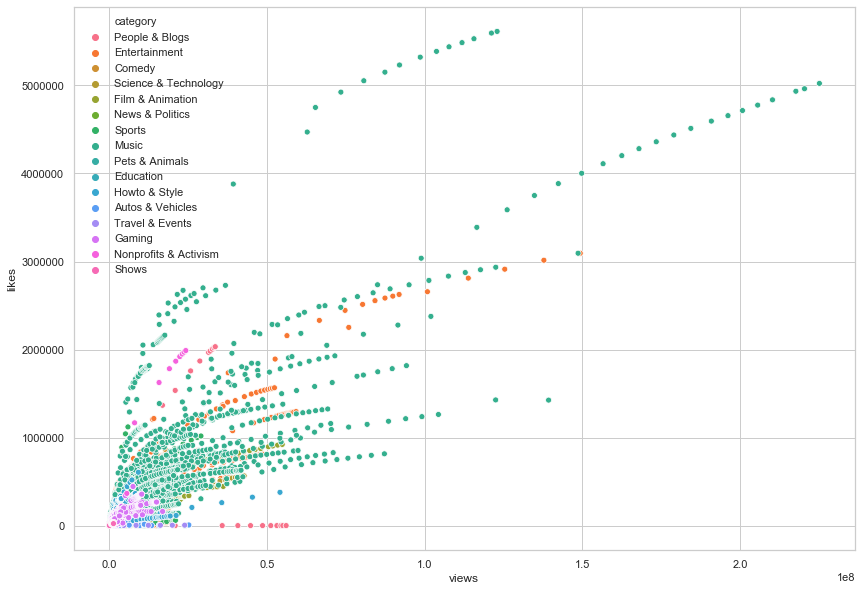

In [131]:
# likes vs views
plt.figure(figsize = (14,10))
sns.scatterplot(x='views', y='likes', data=yt,hue='category')
plt.legend(loc='best',frameon=False)

[Text(0, 0.5, 'No. of videos'), Text(0.5, 0, 'Views')]

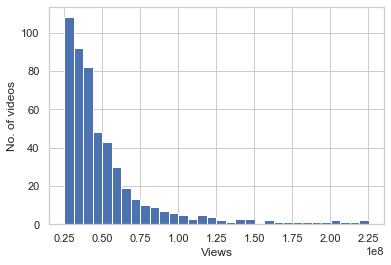

In [132]:
#Distribution of No. of videos by views
fig, ax = plt.subplots()
sns.distplot(yt[yt["views"] >25e6]["views"], kde=False, 
                  hist_kws={'alpha': 1}, ax=ax)
ax.set(xlabel="Views", ylabel="No. of videos")

(array([736664., 736695., 736726., 736754., 736785., 736815., 736846.]),
 <a list of 7 Text xticklabel objects>)

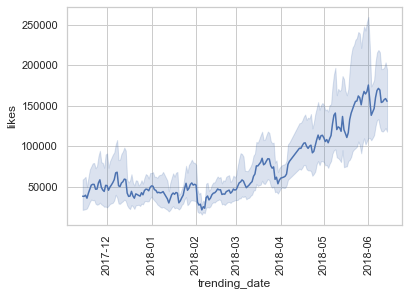

In [133]:
# Likes over period of time
sns.lineplot(x='trending_date',y ='likes', data=yt,palette=sns.cubehelix_palette(n_colors=24))
plt.xticks(rotation='vertical')

# Boolean Variables Specific
    We can see only a very few number of videos with either Ratings Disabled or Video Error or Comments Disabled. But comparatively among these variables, comments disabled videos are more than the other variables.

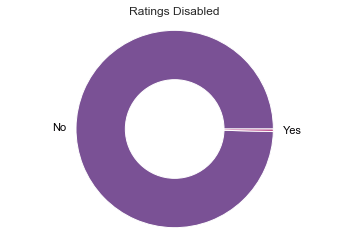

In [134]:
my_circle=plt.Circle( (0,0), .5, color='white')
value_counts = yt["ratings_disabled"].value_counts().to_dict()
fig, ax = plt.subplots()
ax.pie(x=[value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
           colors=['#7a5195',   '#bc5090'], textprops={'color': '#040204'})
ax.axis('equal')
ax.set_title('Ratings Disabled')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

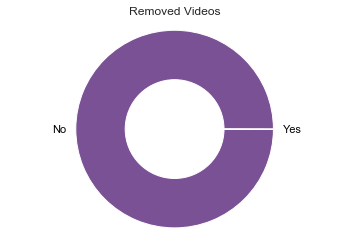

In [135]:
my_circle=plt.Circle( (0,0), .5, color='white')
value_counts = yt["video_error_or_removed"].value_counts().to_dict()
fig, ax = plt.subplots()
ax.pie(x=[value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
           colors=['#7a5195',   '#bc5090'], textprops={'color': '#040204'})
ax.axis('equal')
ax.set_title('Removed Videos')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

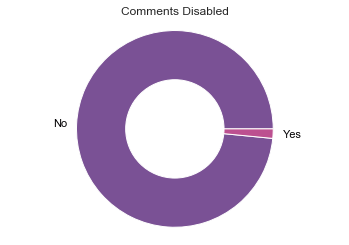

In [136]:
my_circle=plt.Circle( (0,0), .5, color='white')
value_counts = yt["comments_disabled"].value_counts().to_dict()
fig, ax = plt.subplots()
ax.pie(x=[value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
           colors=['#7a5195',   '#bc5090'], textprops={'color': '#040204'})
ax.axis('equal')
ax.set_title('Comments Disabled')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

# Title Specific
    Adding attractive words to the videos is one of the most important things to do. By wordcloud, we have analysed more popular words or tags in the title.

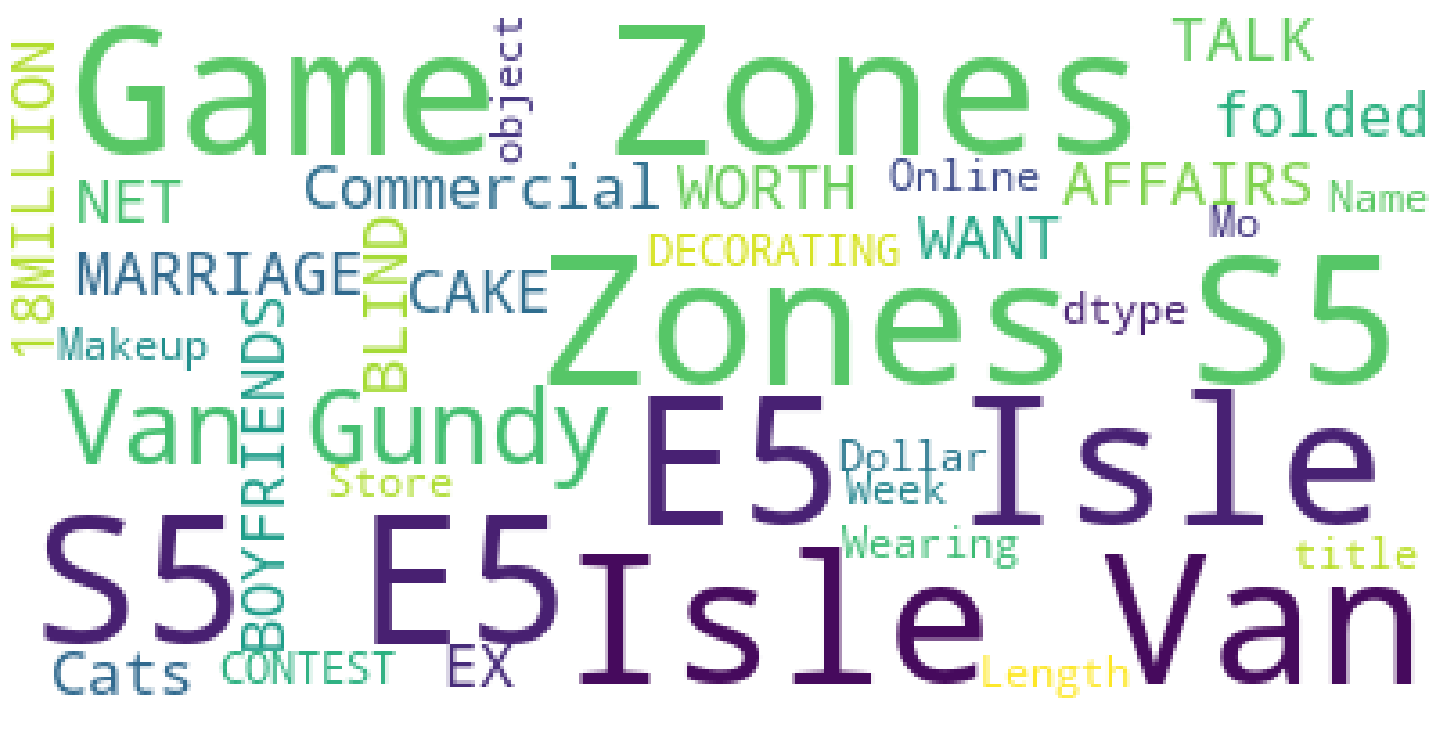

In [140]:
# most popular words in title
plt.figure(figsize = (20,20),facecolor = None)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'white',stopwords = stopwords,  min_font_size = 10,
                      max_words = 1000,max_font_size = 50,random_state = 42).generate(str(yt['title']))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0) 
plt.show()

# Conclusion 
    Based on the analysis and plots of youtube trends data, the following conclusions can be drawn:
        -Music and Gaming genre videos tops the list followed by Comedy, Film & Animation.
        -Friday seems to be the best day to publish videos.
        -Tags contributes more towards the views count.
        -ESPN manages to be in top and Ellen Show gets more attention.    